![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [110]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
pd.set_option('display.max_columns', None)
penguins_df.head()


#species= ['Adelie', 'Chinstrap', 'Gentoo']


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


Checking any NaNs values or empty

In [111]:
nan_count = penguins_df.isna().sum()
print(nan_count)

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [112]:
penguins_df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,332.000000,332.000000,332.000000,332.000000
mean,44.021084,17.153012,200.975904,4206.475904
std,5.452462,1.960275,14.035971,806.361278
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.700000,17.300000,197.000000,4025.000000
75%,48.625000,18.700000,213.000000,4781.250000
max,59.600000,21.500000,231.000000,6300.000000


## Preprocessing steps to create dummy variable using Pandas get_dummies method

In [113]:

#penguins_dummies = penguins_dummies.drop("sex", axis=1)
penguins_dummies = pd.get_dummies(penguins_df, columns=["sex"], drop_first=True)
print(penguins_dummies.head())


   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  sex_MALE
0              39.1             18.7              181.0       3750.0         1
1              39.5             17.4              186.0       3800.0         0
2              40.3             18.0              195.0       3250.0         0
3              36.7             19.3              193.0       3450.0         0
4              39.3             20.6              190.0       3650.0         1


## Standardizing the Data 

In [114]:
scaler = StandardScaler()
dummies_scaler = scaler.fit_transform(penguins_dummies)

## Detecting the Optimal numbers of Clusters using Elbow Method

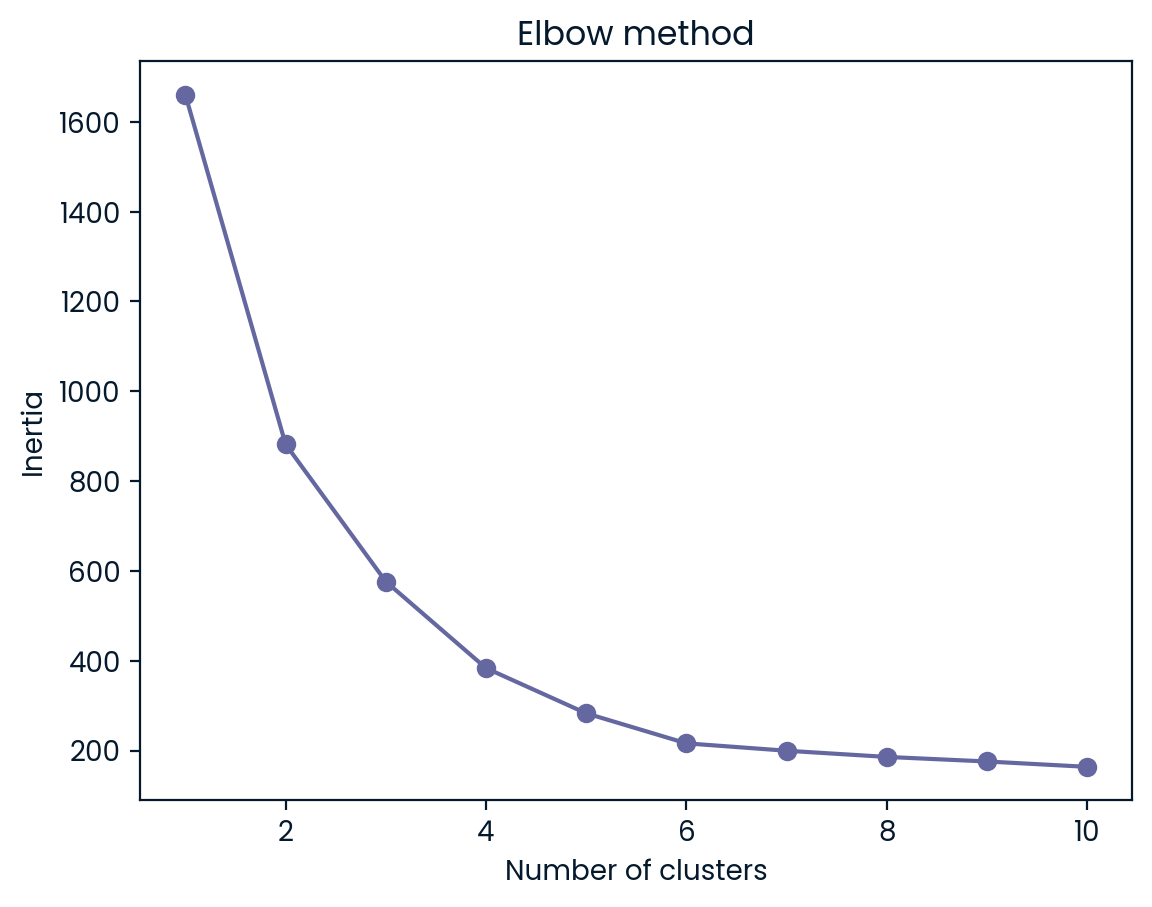

In [115]:
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(dummies_scaler)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show() 

## KMeans Clustering

In [116]:
# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4, random_state=42)

labels = kmeans.fit_predict(dummies_scaler) 

print(f"Labels Shape= {labels.shape} - Labels: {type(labels)}")

penguins_dummies['label'] = labels
print(penguins_dummies.head())

Labels Shape= (332,) - Labels: <class 'numpy.ndarray'>
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
0              39.1             18.7              181.0       3750.0   
1              39.5             17.4              186.0       3800.0   
2              40.3             18.0              195.0       3250.0   
3              36.7             19.3              193.0       3450.0   
4              39.3             20.6              190.0       3650.0   

   sex_MALE  label  
0         1      0  
1         0      2  
2         0      2  
3         0      2  
4         1      0  


## Cluster Profile 

In [117]:
stat_penguins = penguins_dummies.groupby('label').mean()
print(f"Print Cluster summary: \n{stat_penguins}")

Print Cluster summary: 
       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g  \
label                                                                      
0             43.878302        19.111321         194.764151  4006.603774   
1             45.563793        14.237931         212.706897  4679.741379   
2             40.217757        17.611215         189.046729  3419.158879   
3             49.473770        15.718033         221.540984  5484.836066   

       sex_MALE  
label            
0           1.0  
1           0.0  
2           0.0  
3           1.0  


In [118]:
# Import required modules
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dummies_scaler)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=["PC1", "PC2"])
pca_df["label"] = labels


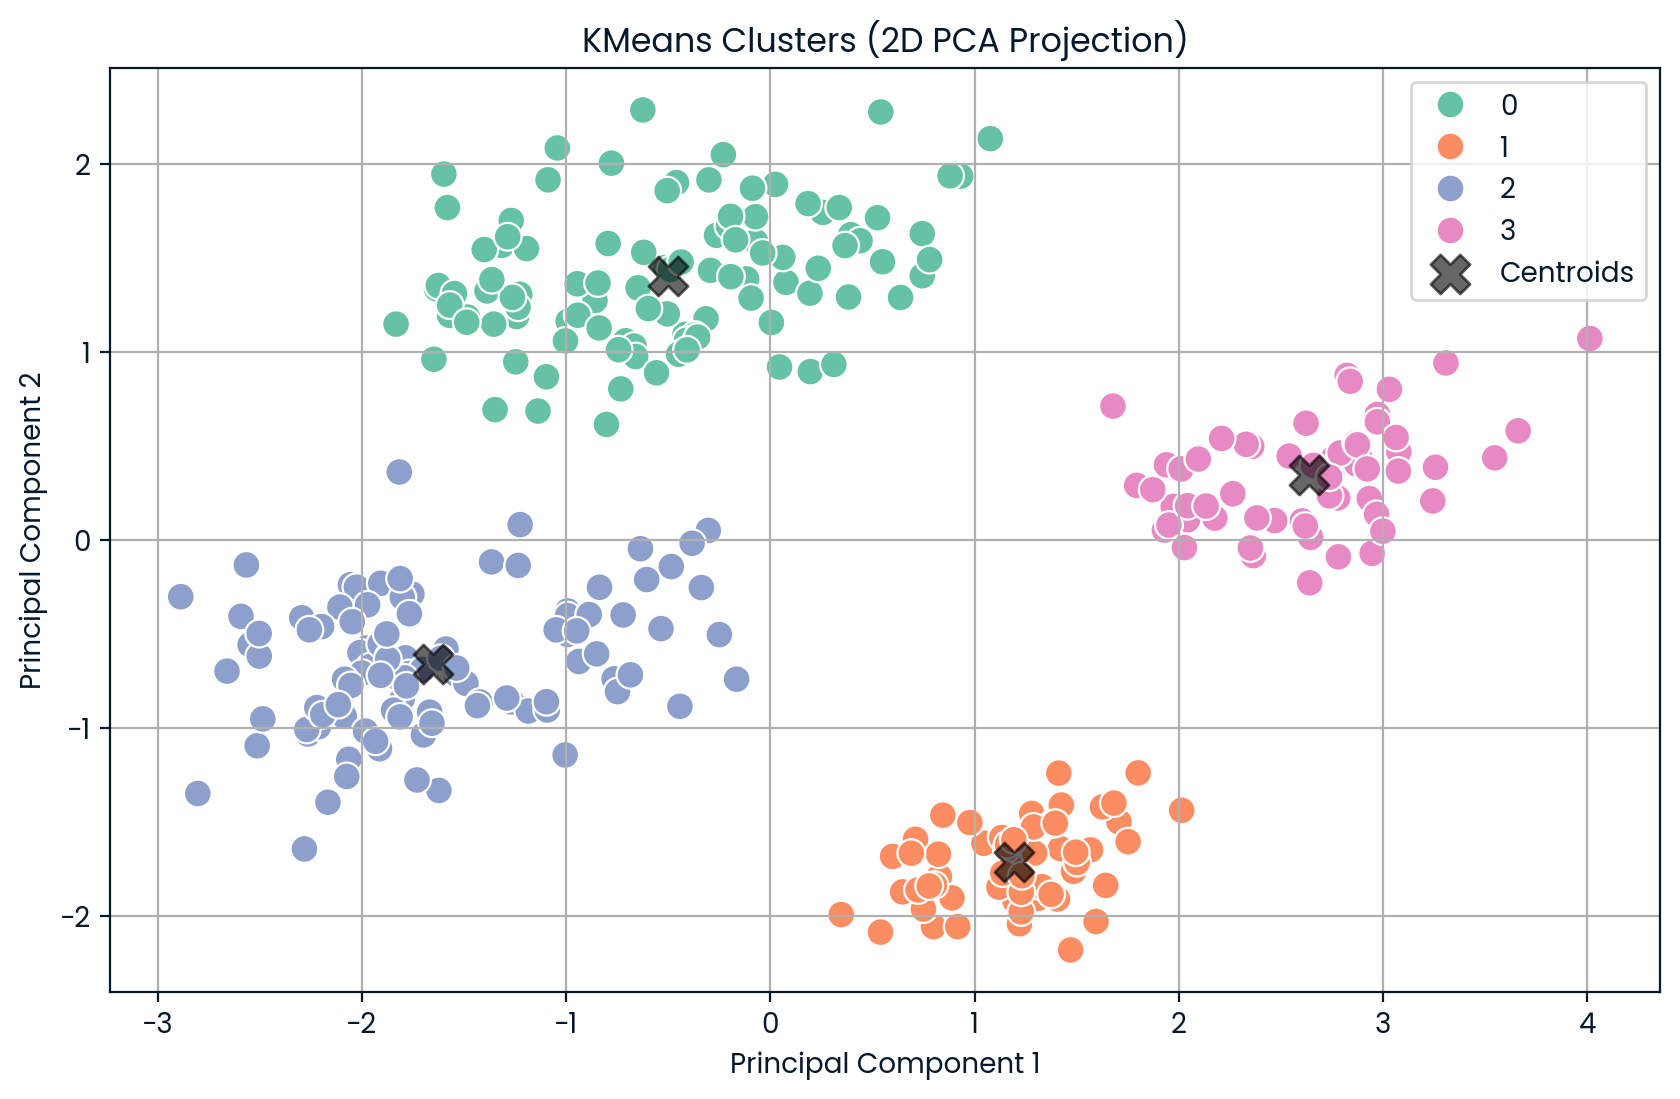

In [119]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="label", palette="Set2", s=100)

# Adding cluster centers
centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.6, marker='X', label='Centroids')

plt.title("KMeans Clusters (2D PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()
